# 02_Classification

> Last Update: 06/13/2020 <br>
Author: [Gunsu Altindag](https://www.linkedin.com/in/gunsualtindag) | [Yalim Demirkesen](https://www.linkedin.com/in/yalimdemirkesen/)

**Description**

After the preprocessing is completed, we have the dataset that we will train/test our classification model. After the testing is completed, I have an additional dataset for all the combinations of location, industry, part of the day, day of the week and amount spent. The model will be used to predict how many conversions we will have as a result of the campaigns.

In [83]:
# necessary libraries:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
import pandas as pd
import numpy as np
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# display settings
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 500

# modelling libraries:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [84]:
# # import pickle
# # from datetime import datetime, date, time, timedelta
# # from dateutil import relativedelta

# from scipy.stats import gaussian_kde
# # from hashlib import md5

# # import os 
# # import sys
# # import re
# # import io
# # import requests
# # import zipfile

# #import pystan 
# #import matplotlib as plt



# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, KFold, cross_val_score
# from sklearn.base import clone, BaseEstimator, TransformerMixin
# from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, roc_curve, precision_recall_curve, auc, make_scorer, recall_score
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.compose import ColumnTransformer, make_column_transformer
# from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder, MultiLabelBinarizer
# from sklearn_features.transformers import DataFrameSelector
# from itertools import product


# # from __future__ import print_function





# # from sklearn.preprocessing import Imputer
# # from sklearn.preprocessing import CategoricalEncoder

# # from sklearn.compose import TransformedTargetRegressor
# from sklearn.ensemble import RandomForestClassifier
# # from sklearn.preprocessing import QuantileTransformer
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier 
# from sklearn.metrics import balanced_accuracy_score
# # from imblearn.datasets import fetch_datasets
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier 

# # from sklearn.datasets.samples_generator import make_blobs
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import SGDClassifier
# # from sklearn.metrics import hamming_loss
# # from sklearn import metrics

# from sklearn.calibration import CalibratedClassifierCV
# from sklearn import linear_model

# #Import scikit-learn metrics module for accuracy calculation
# # from sklearn import metrics
# # from imblearn.ensemble import BalancedBaggingClassifier
# # from imblearn.ensemble import BalancedRandomForestClassifier
# # from imblearn.ensemble import EasyEnsembleClassifier
# # from imblearn.ensemble import RUSBoostClassifier
# # from imblearn.metrics import geometric_mean_score
# from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
# import nltk
# # from nltk.classify.scikitlearn import SklearnClassifier
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel

# from imblearn import under_sampling, over_sampling

# # from imblearn.datasets import make_imbalance
# # from imblearn.under_sampling import NearMiss
# # from imblearn.pipeline import make_pipeline
# # from imblearn.metrics import classification_report_imbalanced
# # from collections import Counter
# # from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
# # from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.combine import SMOTEENN, SMOTETomek
# # from imblearn.ensemble import BalanceCascade, EasyEnsemble

# # import sagemaker
# # from sagemaker.tensorflow import TensorFlow

# import tensorflow # Imports tensorflow
# import keras # Imports keras

# from keras.models import Sequential #Sequential Models
# from keras.layers import Dense, Dropout #Dense Fully Connected Layer Type
# from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer
# from keras.callbacks import EarlyStopping
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import to_categorical

# from sklearn import tree
# import graphviz
# from IPython.display import Image
# # import io
# # from sklearn.externals.six import StringIO  
# import pydot
# import pydotplus
# from graphviz import Digraph

# # from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz

In [ ]:
# from itertools import product

# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier

In [85]:
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names=attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

In [86]:
# !pip install pymc3

In [87]:
# import pymc3 as pm

In [88]:
# !conda config --add channels conda-forge

## Uploading and Preparing the Data

In [89]:
fb = pd.read_csv("./data/fb.csv")

In [90]:
df_sept = pd.read_csv("./data/testdata_sep.csv")

In [91]:
fb.shape

(23384, 28)

In [92]:
fb.drop(columns=['Unnamed: 0'], inplace=True)
df_sept.drop(columns=['Unnamed: 0'], inplace=True)

I will exclude the month of September from the training and testing data. After I test the data, I will go on and make the predictions and optimization and compare it with the actual results in September. 

In [93]:
fb[(fb['2019']==1) & (fb['month']==9)].to_csv('./data/actual_sep.csv')

In [94]:
fb = fb[~((fb['2019']==1) & (fb['month']==9))].reset_index(drop=True)

In [95]:
fb.head()

,month,week_num,afternoon,evening,morning,night,DE,ES,FR,IT,MX,UK,US,ZA,OR,SSF,Mon,Tues,Weds,Thurs,Fri,Sat,Sun,2018,2019,amount_spent_usd,labels
0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,17.052800,btw 1 and 2 conversions
1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,23.137473,btw 1 and 2 conversions
2,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,3.204700,0 conversions
3,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,39.000829,0 conversions
4,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,11.831640,0 conversions


In [96]:
df_sept.head()

,month,week_num,afternoon,evening,morning,night,DE,ES,FR,IT,MX,UK,US,ZA,OR,SSF,Fri,Mon,Sat,Sun,Thurs,Tues,Weds,2018,2019,amount_spent_usd
0,9,35,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,9,35,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,9,35,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,9,35,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,9,35,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [97]:
# creating the predictor and target datasets:
X = fb[['month','week_num','DE','ES','FR','IT','MX','UK','US','ZA','OR','SSF','night','morning','afternoon','evening',
        'Mon','Tues','Weds','Thurs','Fri','Sat','Sun','2018','2019','amount_spent_usd']]
y = fb['labels']

In [98]:
X_sep = df_sept[['month','week_num','DE','ES','FR','IT','MX','UK','US','ZA','OR','SSF','night','morning','afternoon','evening',
        'Mon','Tues','Weds','Thurs','Fri','Sat','Sun','2018','2019','amount_spent_usd']]

In [99]:
# splitting the data into training and testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25,random_state=44)

Checking the shape of each new dataset. I expect training and testing datasets to have same length. All datasets need to have same number of predictors.

In [100]:
X_train.shape

(16676, 26)

In [101]:
y_train.shape

(16676,)

In [102]:
y_test.shape

(5559,)

In [103]:
X_test.shape

(5559, 26)

In [104]:
X_sep.shape

(337920, 26)

In [105]:
y_train.value_counts()

0 conversions              6528
btw 1 and 2 conversions    5338
btw 3 and 5 conversions    2726
more than 5 conversions    2084
Name: labels, dtype: int64

Scaling for the amount spent column throughout all the datasets:

In [106]:
scaler = StandardScaler()

In [107]:
X_train['amount_spent_usd'] = scaler.fit_transform(X_train.amount_spent_usd.values.reshape(-1, 1))

In [108]:
X_train.amount_spent_usd.describe()

count    1.667600e+04
mean     2.014393e-16
std      1.000030e+00
min     -5.598794e-01
25%     -4.632067e-01
50%     -3.437911e-01
75%     -4.851158e-03
max      1.877850e+01
Name: amount_spent_usd, dtype: float64

In [109]:
X_test['amount_spent_usd'] = scaler.fit_transform(X_test.amount_spent_usd.values.reshape(-1, 1))

In [110]:
X_test.amount_spent_usd.describe()

count    5.559000e+03
mean     1.773481e-16
std      1.000090e+00
min     -5.849667e-01
25%     -4.850203e-01
50%     -3.609831e-01
75%     -7.979976e-04
max      1.884786e+01
Name: amount_spent_usd, dtype: float64

In [111]:
X_sep['amount_spent_usd'] = scaler.fit_transform(X_sep.amount_spent_usd.values.reshape(-1, 1))

In [112]:
X_sep.amount_spent_usd.describe()

count    3.379200e+05
mean    -1.135324e-17
std      1.000001e+00
min     -1.722237e+00
25%     -8.611187e-01
50%      0.000000e+00
75%      8.611187e-01
max      1.722237e+00
Name: amount_spent_usd, dtype: float64

## Modelling

In the modelling phase, the road map is to create an ensemble model including different classification models. At the end the models will have a weight as much as their accuracy. The weights will be summed and the class with the most votes will be accepted as the final prediction.

Let's say, each algorithm's predictions for the level of conversion if we spend $50 for 09/03/2019 evening (in the time zone of the host account) for users in Germany who are in OR industry:
- Algorithm 1 predicts for each class: 0.23 | 0.07 | 0.63 | 0.07
- Algorithm 2 predicts for each class: 0.21 | 0.02 | 0.57 | 0.20
- Algorithm 3 predicts for each class: 0.27 | 0.05 | 0.66 | 0.02
- Algorithm 4 predicts for each class: 0.15 | 0.04 | 0.59 | 0.22
- Algorithm 5 predicts for each class: 0.19 | 0.06 | 0.33 | 0.42

Then the conversions between 3 and 5 wins since its average probability is higher than any other class.

### Logistic Regression

In logistic regression, we will use softmax instead of sigmoid function which is the default case. The reason is we are working with multiclass problem. While initiating the model, there will be different hyperparameters that we need to work with which are listed below:
- `multiclass`: this will be `multinomial` since we are dealing with a multiclass problem.
- `solver`: there are plenty solvers that we can use for this use case which are `newton-cg`, `sag`, `saga` and `lbfgs`.
    - Newton's Method uses a quadratic approximation. In each step we are getting closer to the global optima. It is expensive to deploy and also has problems with minimax (saddle) points. 
    <img src="https://i.stack.imgur.com/VqQnf.png" >
    - Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm is very similar to Newton's but it stores that represent the approximation. lbfgs is very memory efficient but have some drawbacks like converging to any value. No global optima is guarenteed.
    - Stochastic Average Gradient holds a memory of previous gradient values and using this technique it converges faster. Storing older iterations makes it more precise but slower.
    - SAGA is a version of Stochastic Average Gradient that supports L1 regularization which eliminates the non-contributing predictors. That's why its best use is with large datasets.
- `penalty`: most of the solvers need `l2` but with saga we can also use `l1` but we don't need to utilize that since out dataset is not huge in terms of predictors.
- `tol`: stands for tolerance. This is the level for scikit-learn to understand when to stop for optimizing the objective function of the model.
- `C`: smaller C gets, stronger regularization becomes. 
- `max_iter`: just like tol, max_iter provides a limit for the model to stop looking for additional improvement.

**[Source: scikit-learn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [113]:
softmax_params = {
    'C':[12,13,14,15],
    'max_iter':[10000,100000]
    
}

softmax_grid = GridSearchCV(
                    LogisticRegression(multi_class='multinomial', 
                                       solver='lbfgs',
                                       penalty='l2',
                                       tol=1e-16, 
                                      ),
                    softmax_params,
                    cv = 5,
                    verbose = 1,
                    return_train_score = True
)

In [115]:
# fit the data:
softmax_reg=softmax_grid.fit(X_train,y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


In [118]:
label=np.unique(y_train)

In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.tight_layout()

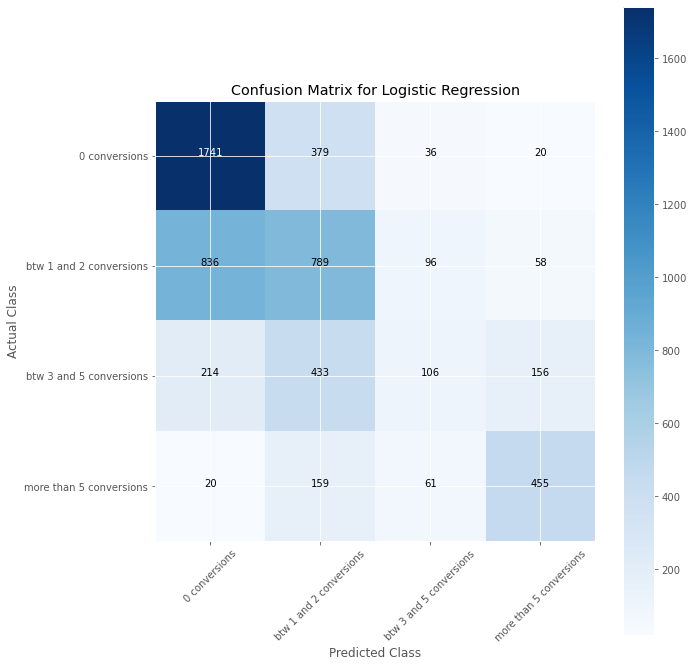

In [120]:
cnf_matrix = confusion_matrix(y_test, y_pred_softmax,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion Matrix for Logistic Regression')

In [121]:
print("Accuracy of the training set: {}".format(round(accuracy_score(y_train,softmax_grid.predict(X_train)),4)))
print("Accuracy of the training set: {}".format(round(accuracy_score(y_test,softmax_grid.predict(X_test)),4)))

Accuracy of the training set: 0.5504
Accuracy of the training set: 0.556


In [155]:
# generate the predictions:
y_pred_softmax = softmax_grid.predict(X_test)  
y_pred_sep_softmax = softmax_grid.predict(X_sep)

# calculate the probabilities:
y_prob_softmax = softmax_grid.predict_proba(X_test)
y_prob_sep_softmax = softmax_grid.predict_proba(X_sep)

As expected the accuracy of the Logistic Regression model is not that high. After all it is a better model to use when we have a binary classification problem. Next model I will use it Random Forest. Now I am expecting a higher performance since we will be using an ensemble model that takes into account the "forest" instead of the single "trees".

### Random Forest

Random forest hyperparameters:
- `n_estimators`: number of trees
- `criterion`: `gini` or `entropy`
- `max_depth`: max depth for the trees
- `min_sample_split`: minimum number of samples needed to split the nodes:
- `max_features`: number of features to consider while splitting
    - `auto` for square root of number of features.
    - `None` for taking into account all the features.
    - if int, then take that many features.
- `class_weight`: Described like the following in the sklearn webpage:
>*Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.*
    *Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be `[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}]` instead of `[{1:1}, {2:5}, {3:1}, {4:1}]`.
    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`. 
    The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.*

**[Source: scikit-learn random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**

In [143]:
rfc = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 16 ,
                             n_jobs =-1, random_state=42)

param_grid = {
    'min_samples_split': [5, 7], 
    'n_estimators' : [400,500,600],
    'max_depth': [25,27,30],
    'max_features': [20,22]
}

scorers = {
    'precision_score': make_scorer(precision_score,average='micro'),
    'recall_score': make_scorer(recall_score,average='micro')
}

In [150]:
# fits a GridSearchCV classifier using refit_score for optimization
refit_score='precision_score'

# prints classifier performance metrics
skf = StratifiedKFold(n_splits=10)
rfc_grid = GridSearchCV(rfc, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)


In [151]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_leaf_nodes=16,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [25, 27, 30], 'max_features': [20, 22],
                         'min_samples_split': [5, 7],
                         'n_estimators': [400, 500, 600]},
             refit='precision_score', return_train_score=True,
             scoring={'precision_score': make_scorer(precision_score, average=micro),
                      'recall_score': make_scorer(recall_score, average=micro)})

In [153]:
print('Best parameters for {}:'.format(refit_score))
print(rfc_grid.best_params_)
print('Best score for {}:'.format(refit_score))
print(rfc_grid.best_score_)

Best parameters for precision_score:
{'max_depth': 25, 'max_features': 22, 'min_samples_split': 5, 'n_estimators': 500}
Best score for precision_score:
0.5587675630341558


In [154]:
# Build the model after having the hyperparameters that creates the highest performance:

# Using entropy during the split:
clf_rf_enpy = RandomForestClassifier(criterion='entropy',max_depth=25, 
                                 max_features=22,min_samples_split=5, 
                                 n_estimators=500).fit(X_train, y_train)

# Using gini during the split:
clf_rf_gini = RandomForestClassifier(criterion='gini',max_depth=25, 
                                 max_features=22,min_samples_split=5, 
                                 n_estimators=500).fit(X_train, y_train)

In [156]:
# make the predictions for rf with entropy
y_pred_enpy = clf_rf_enpy.predict(X_test)
y_pred_sep_enpy = clf_rf_enpy.predict(X_sep)

# calculate the probabilities for rf with entropy
y_prob_enpy = clf_rf_enpy.predict_proba(X_test)
y_prob_sep_enpy = clf_rf_enpy.predict_proba(X_sep)

# make the predictions for rf with gini
y_pred_gini = clf_rf_gini.predict(X_test)
y_pred_sep_gini = clf_rf_gini.predict(X_sep)

# calculate the probabilities for rf with gini
y_prob_gini = clf_rf_gini.predict_proba(X_test)
y_prob_sep_gini = clf_rf_gini.predict_proba(X_sep)

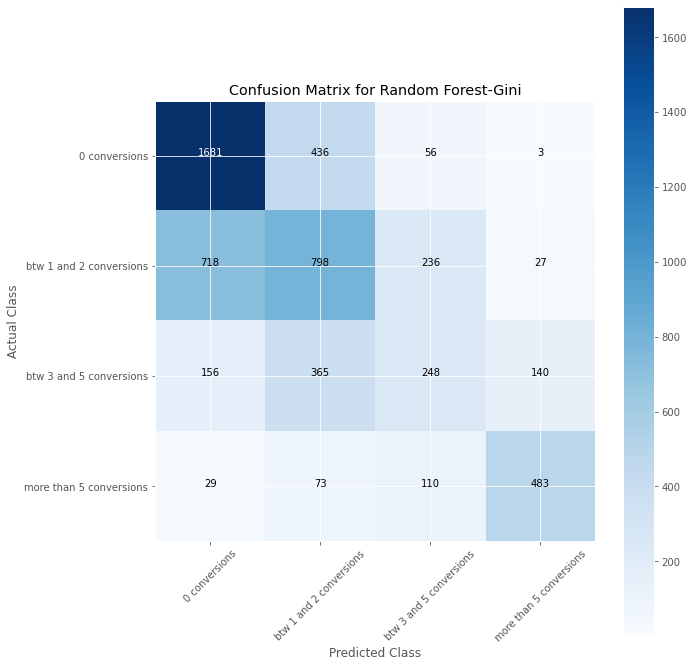

In [157]:
cnf_matrix = confusion_matrix(y_test, y_pred_gini,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion Matrix for Random Forest-Gini')

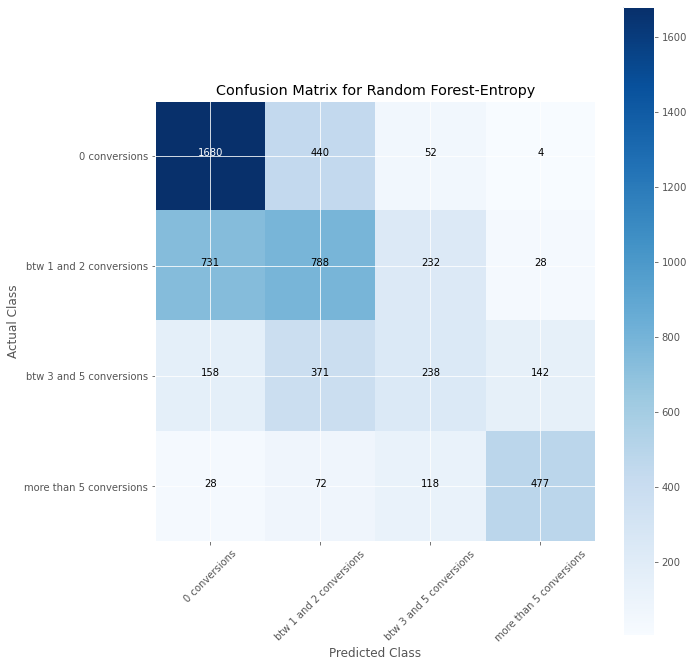

In [158]:
cnf_matrix = confusion_matrix(y_test, y_pred_enpy,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion Matrix for Random Forest-Entropy')

Since at the end I will build a voting ensemble, we need a dataframe with probabilities and predictions for each observation with probabilities for each algorithm. 

In [162]:
y_test_df=pd.DataFrame(y_test)
y_test_sep_df=pd.DataFrame(None)

In [163]:
y_test.head()

7890     more than 5 conversions
21440              0 conversions
5536     btw 1 and 2 conversions
14287    more than 5 conversions
12994              0 conversions
Name: labels, dtype: object

In [164]:
# For logistic regression:
y_test_df['pred_softmax'] = y_pred_softmax
y_test_df['prob_softmax']= np.round(np.array(y_prob_softmax),2).tolist()

y_test_sep_df['pred_softmax'] = y_pred_sep_softmax
y_test_sep_df['prob_softmax'] = np.round(np.array(y_prob_sep_softmax),2).tolist()

# For Random Forest with Gini:
y_test_df['pred_rf_gini'] = y_pred_gini
y_test_df['prob_rf_gini']= np.round(np.array(y_prob_gini),2).tolist()

y_test_sep_df['pred_rf_gini'] = y_pred_sep_gini
y_test_sep_df['prob_rf_gini'] = np.round(np.array(y_prob_sep_gini),2).tolist()

# For Random Forest with Entropy:
y_test_df['pred_rf_enpy'] = y_pred_enpy
y_test_df['prob_rf_enpy']= np.round(np.array(y_prob_enpy),2).tolist()

y_test_sep_df['pred_rf_enpy'] = y_pred_sep_enpy
y_test_sep_df['prob_rf_enpy'] = np.round(np.array(y_prob_sep_enpy),2).tolist()

In [165]:
y_test_df.head(2)

,labels,pred_softmax,prob_softmax,pred_rf_gini,prob_rf_gini,pred_rf_enpy,prob_rf_enpy
7890,more than 5 conversions,more than 5 conversions,"[0.0, 0.11, 0.32, 0.56]",more than 5 conversions,"[0.02, 0.04, 0.4, 0.54]",more than 5 conversions,"[0.02, 0.03, 0.41, 0.54]"
21440,0 conversions,0 conversions,"[0.79, 0.18, 0.03, 0.0]",0 conversions,"[0.92, 0.08, 0.0, 0.0]",0 conversions,"[0.93, 0.07, 0.0, 0.0]"


In [166]:
y_test_sep_df.head(2)

,pred_softmax,prob_softmax,pred_rf_gini,prob_rf_gini,pred_rf_enpy,prob_rf_enpy
0,0 conversions,"[0.97, 0.02, 0.0, 0.0]",0 conversions,"[0.92, 0.08, 0.0, 0.0]",0 conversions,"[0.95, 0.05, 0.0, 0.0]"
1,0 conversions,"[0.99, 0.01, 0.0, 0.0]",0 conversions,"[0.99, 0.01, 0.0, 0.0]",0 conversions,"[0.98, 0.02, 0.0, 0.0]"


In [167]:
# create a new df to include the features
df_test = pd.merge(X_test,y_test_df,how = 'left',left_index = True, right_index = True)

In [169]:
df_test_sep = pd.merge(X_sep.reset_index(drop = True),y_test_sep_df,how = 'left',left_index = True, right_index = True)

In [173]:
df_test.head()

,month,week_num,DE,ES,FR,IT,MX,UK,US,ZA,OR,SSF,night,morning,afternoon,evening,Mon,Tues,Weds,Thurs,Fri,Sat,Sun,2018,2019,amount_spent_usd,labels,pred_softmax,prob_softmax,pred_rf_gini,prob_rf_gini,pred_rf_enpy,prob_rf_enpy
7890,7,27,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.861900,more than 5 conversions,more than 5 conversions,"[0.0, 0.11, 0.32, 0.56]",more than 5 conversions,"[0.02, 0.04, 0.4, 0.54]",more than 5 conversions,"[0.02, 0.03, 0.41, 0.54]"
21440,8,33,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,-0.386709,0 conversions,0 conversions,"[0.79, 0.18, 0.03, 0.0]",0 conversions,"[0.92, 0.08, 0.0, 0.0]",0 conversions,"[0.93, 0.07, 0.0, 0.0]"
5536,4,17,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,-0.334054,btw 1 and 2 conversions,btw 1 and 2 conversions,"[0.26, 0.33, 0.27, 0.14]",0 conversions,"[0.46, 0.36, 0.13, 0.05]",0 conversions,"[0.47, 0.36, 0.14, 0.04]"
14287,2,6,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.657277,more than 5 conversions,more than 5 conversions,"[0.01, 0.17, 0.27, 0.55]",more than 5 conversions,"[0.0, 0.02, 0.08, 0.9]",more than 5 conversions,"[0.0, 0.03, 0.1, 0.87]"
12994,12,50,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,-0.473704,0 conversions,0 conversions,"[0.61, 0.31, 0.07, 0.0]",0 conversions,"[0.87, 0.11, 0.02, 0.0]",0 conversions,"[0.92, 0.08, 0.0, 0.0]"


### kNN

In [143]:
rfc = KNeighborsClassifier(n_neighbors=7)(n_estimators = 50, max_leaf_nodes = 16 ,
                             n_jobs =-1, random_state=42)

param_grid = {
    'min_samples_split': [5, 7], 
    'n_estimators' : [400,500,600],
    'max_depth': [25,27,30],
    'max_features': [20,22]
}

scorers = {
    'precision_score': make_scorer(precision_score,average='micro'),
    'recall_score': make_scorer(recall_score,average='micro')
}

In [150]:
# fits a GridSearchCV classifier using refit_score for optimization
refit_score='precision_score'

# prints classifier performance metrics
skf = StratifiedKFold(n_splits=10)
rfc_grid = GridSearchCV(rfc, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)


In [151]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_leaf_nodes=16,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [25, 27, 30], 'max_features': [20, 22],
                         'min_samples_split': [5, 7],
                         'n_estimators': [400, 500, 600]},
             refit='precision_score', return_train_score=True,
             scoring={'precision_score': make_scorer(precision_score, average=micro),
                      'recall_score': make_scorer(recall_score, average=micro)})

In [153]:
print('Best parameters for {}:'.format(refit_score))
print(rfc_grid.best_params_)
print('Best score for {}:'.format(refit_score))
print(rfc_grid.best_score_)

Best parameters for precision_score:
{'max_depth': 25, 'max_features': 22, 'min_samples_split': 5, 'n_estimators': 500}
Best score for precision_score:
0.5587675630341558


In [ ]:
# Training classifiers:
clf1 = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.01, kernel='rbf', probability=True)

# Combining them with a voting classifier:
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(train_X, y_train)
clf2.fit(train_X, y_train)
clf3.fit(train_X, y_train)
eclf.fit(train_X, y_train)


In [ ]:
cross_val_score(eclf,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
y_pred_clf1 = clf1.predict(test_X) 
y_pred_clf2 = clf2.predict(test_X)
y_pred_clf3 = clf3.predict(test_X)
y_pred_voter=eclf.predict(test_X)

In [ ]:
select_ind = np.array(list(range(0,100)))
testa_X.tocsr()[select_ind,:]

In [ ]:
y_preda_clf1 = clf1.predict(testa_X)
y_preda_clf2 = clf2.predict(testa_X)
y_preda_clf3 = clf3.predict(testa_X)
y_preda_voter=eclf.predict(testa_X)

In [ ]:
prb_voter_clf=eclf.predict_proba(test_X)
my_list_voter=np.round(np.array(prb_voter_clf),2).tolist()

In [ ]:
prba_voter_clf=eclf.predict_proba(testa_X)
my_lista_voter=np.round(np.array(prba_voter_clf),2).tolist()

In [ ]:
df_test['pred_voter']=y_pred_voter
df_test['prop_voter']=my_list_voter

In [ ]:
df_testa['pred_voter']=y_preda_voter
df_testa['prop_voter']=my_lista_voter

In [ ]:
df_test.head()

In [ ]:
df_testa.head()

In [ ]:
cross_val_score(clf_rf_gini,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
cross_val_score(clf_rf_enpy,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
cnf_matrix_gini = confusion_matrix(y_test,y_pred_voter,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_gini, classes=label,
                      title='Confusion matrix, without normalization')

In [ ]:
#rf_err_df=df_test[df_test['labels']!=df_test['rf_pred']].iloc[0:30,0:12].head(30)

In [ ]:
unique_val_count(df_test.target_grouped)

In [ ]:
df_test.head(15)

In [ ]:
df_test["month"] = pd.to_numeric(df_test["month"])

In [ ]:
df_testa["month"] = pd.to_numeric(df_testa["month"])

In [ ]:
np.unique(df_test.labels)

In [ ]:
df_test.head(2)

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

#df_test['new'] = np.where(df_test.labels=='btw 0 and 2 conversions', 'low',
                          # np.where(df_test.labels=='more 3 than 6 conversions', 'low','high'))

In [ ]:
#df_test=df_test.drop('new',axis=1)

Below code generated an error saying that 'seaborn doesn't have a function called catplot.' That's why I picked countplot with the same purpose.

In [ ]:
# orders=label
# sns.set_style("whitegrid")
# sns.set(font_scale=1)
# p=sns.catplot(x="labels",hue="labels", kind="count",order=orders,height=8,aspect=1,col='year', data=df_test)



In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=df_test['year'], hue = df_test['labels'], 
                    data = df_test, )

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier( splitter = "random" ,class_weight='balanced', max_leaf_nodes = 5, min_samples_split=10 ), 
                            n_estimators =100 , max_samples = 0.5 , bootstrap = True , n_jobs =-1 ) 

In [ ]:
bag_clf.fit(train_X,y_train)

In [ ]:
cross_val_score(bag_clf,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
X_train.shape[0]

In [ ]:
smote=SMOTE('minority')

In [ ]:
X_sm_logr,y_sm_logr=smote.fit_sample(train_X,y_train)

In [ ]:
logr_sm=softmax_reg.fit(X_sm_logr,y_sm_logr)

In [ ]:
softmax_pred_sm=logr_sm.predict(test_X) 


In [ ]:
softmax_preda_sm=logr_sm.predict(testa_X) 


In [ ]:
cnf_matrix = confusion_matrix(y_test,softmax_pred_sm,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
cross_val_score(logr_sm,X_sm_logr, y_sm_logr, cv=10, scoring="accuracy",)

In [ ]:
print (metrics.classification_report(y_test,softmax_pred_sm, target_names=df_test['labels'].unique()))

In [ ]:
#lsvc

lsvc = LinearSVC(C=0.9, penalty="l1", dual=False, multi_class='ovr',class_weight='balanced').fit(train_X, y_train)
model = SelectFromModel(lsvc, prefit=True)

In [ ]:
y_pred_lsvc= lsvc.predict(test_X) 

In [ ]:
y_preda_lsvc= lsvc.predict(testa_X) 

In [ ]:
#df_test['pred_lsvc']=y_pred_lsvc

In [ ]:
#df_test=df_test.drop('pred_lsvc',axis=1)

In [ ]:
cross_val_score(lsvc,train_X, y_train, cv=10, scoring="accuracy",)

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred_lsvc,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
print(metrics.classification_report(y_test, y_pred_lsvc, target_names=df_test['labels'].unique()))

In [ ]:
y_pred_bag= bag_clf.predict(test_X) 

In [ ]:
y_preda_bag= bag_clf.predict(testa_X) 

In [ ]:
prb_bag_clf=bag_clf.predict_proba(test_X)
my_list_bag=np.round(np.array(prb_bag_clf),2).tolist()

In [ ]:
prba_bag_clf=bag_clf.predict_proba(testa_X)
my_lista_bag=np.round(np.array(prba_bag_clf),2).tolist()

In [ ]:
df_test['pred_bag']=y_pred_bag

In [ ]:
df_testa['pred_bag']=y_preda_bag

In [ ]:
df_test['prb_bag_clf']=my_list_bag

In [ ]:
df_testa['prb_bag_clf']=my_lista_bag

In [ ]:
df_test.isnull().sum()

In [ ]:
df_testa.isnull().sum()

In [ ]:
df_test.columns

In [ ]:
df_test.head(10)

In [ ]:
#print(metrics.classification_report(y_test, y_pred_bag, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf1, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf2, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf3, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_voter, target_names=df['labels'].unique()))

In [ ]:
tree_reg=DecisionTreeClassifier(class_weight='balanced',max_depth=3,criterion='gini',min_samples_leaf=10)
tree_reg.fit(train_X,y_train)

In [ ]:
y_pred_tree=tree_reg.predict(test_X)
prb_tree_reg=tree_reg.predict_proba(test_X)
my_list_tree=np.round(np.array(prb_tree_reg),2).tolist()


In [ ]:
y_preda_tree=tree_reg.predict(testa_X)
prba_tree_reg=tree_reg.predict_proba(testa_X)
my_lista_tree=np.round(np.array(prba_tree_reg),2).tolist()


In [ ]:
df_test['pred_reg_tree']=y_pred_tree
df_test['probs_reg_tree']=my_list_tree

In [ ]:
df_testa['pred_reg_tree']=y_preda_tree
df_testa['probs_reg_tree']=my_lista_tree

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_tree,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
!pip install xgboost

In [ ]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [ ]:
# grid search
model_xgb = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_X,y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

In [ ]:
# XGBoost, Tune n_estimators and max_depth
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [ ]:
model_xgb = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(train_X, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [ ]:
model_xgb_tn = XGBClassifier(n_estimators=150,max_depth=4,objective='multi:softprob')
model_xgb_tn.fit(train_X,y_train)

In [ ]:
y_pred_xgb=model_xgb_tn.predict(test_X)

In [ ]:
y_preda_xgb=model_xgb_tn.predict(testa_X)

In [ ]:
np.set_printoptions(precision=3,suppress=True)
prb_xgb_clf=model_xgb_tn.predict_proba(test_X)
my_list_xgb=np.round(np.array(prb_xgb_clf),2).tolist()

In [ ]:
np.set_printoptions(precision=3,suppress=True)
prba_xgb_clf=model_xgb_tn.predict_proba(testa_X)
my_lista_xgb=np.round(np.array(prba_xgb_clf),2).tolist()

In [ ]:
df_test['pred_xgb']=y_pred_xgb
df_test['xgb_prob']=my_list_xgb


In [ ]:
df_testa['pred_xgb']=y_preda_xgb
df_testa['xgb_prob']=my_lista_xgb


In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb, target_names=df_test['labels'].unique()))

In [ ]:
df_test.head(20)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_xgb,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
fb.columns

In [ ]:
# Create adaboost classifer object
abc_discrete =AdaBoostClassifier(n_estimators=100, base_estimator=clf_rf_gini,learning_rate=0.001,
    algorithm="SAMME")

abc_real =AdaBoostClassifier(n_estimators=100, base_estimator=clf_rf_gini,learning_rate=0.001)

In [ ]:
# Train Adaboost Classifer
abc_discrete.fit(train_X, y_train)
abc_real.fit(train_X, y_train)

In [ ]:
#Predict the response for test dataset
y_pred_abc_disc = abc_discrete.predict(test_X)
y_pred_abc_real = abc_real.predict(test_X)




# Model Accuracy, how often is the classifier correct?
print("Accuracy abc SAMME:",metrics.accuracy_score(y_test, y_pred_abc_disc))
print("Accuracy abc:",metrics.accuracy_score(y_test, y_pred_abc_real))

In [ ]:
#Predict the response for test dataset
y_preda_abc_disc = abc_discrete.predict(testa_X)
y_preda_abc_real = abc_real.predict(testa_X)




# Model Accuracy, how often is the classifier correct?
print("Accuracy abc SAMME:",metrics.accuracy_score(y_test, y_pred_abc_disc))
print("Accuracy abc:",metrics.accuracy_score(y_test, y_pred_abc_real))

In [ ]:
print(metrics.classification_report(y_test, y_pred_abc_real, target_names=fb['labels'].unique()))

In [ ]:
print(metrics.classification_report(y_test, y_pred_abc_disc, target_names=fb['labels'].unique()))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_abc_disc,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_abc_real,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
prb_abc_disc=abc_discrete.predict_proba(test_X)
my_list_abc_disc=np.round(np.array(prb_abc_disc),2).tolist()

In [ ]:
prba_abc_disc=abc_discrete.predict_proba(testa_X)
my_lista_abc_disc=np.round(np.array(prba_abc_disc),2).tolist()

In [ ]:
df_test['pred_abc_disc']=y_pred_abc_disc
df_test['probs_abc_disc']=my_list_abc_disc

In [ ]:
df_testa['pred_abc_disc']=y_preda_abc_disc
df_testa['probs_abc_disc']=my_lista_abc_disc

In [ ]:
prb_abc_real=abc_real.predict_proba(test_X)
my_list_abc_real=np.round(np.array(prb_abc_real),2).tolist()

In [ ]:
prba_abc_real=abc_real.predict_proba(testa_X)
my_lista_abc_real=np.round(np.array(prba_abc_real),2).tolist()

In [ ]:
df_test['pred_abc_real']=y_pred_abc_real
df_test['probs_abc_real']=my_list_abc_real


In [ ]:
df_testa['pred_abc_real']=y_preda_abc_real
df_testa['probs_abc_real']=my_lista_abc_real


In [ ]:
df_test.shape

In [ ]:
df_testa.shape

In [ ]:
#np.unique(df_test['topic'].values.tolist())

In [ ]:
df_test[df_test['year']==2019].sort_values(by='amount_spent_usd',ascending=False).head(20)

In [ ]:
df_test[df_test['labels']=='btw 7 and 12 conversions'].head(10)

In [ ]:
# How many observations there are per week in June 2019
june_pred = pd.DataFrame(df_test[(df_test['year'] == 2019) & (df_test['month'] == 6)]['week_num'].value_counts()).reset_index()
june_pred.columns = ['week_num', 'count']
june_pred.sort_values(by = ['week_num'], inplace = True)
june_pred

In [ ]:
# How many observations there are per week in July 2019
july_pred = pd.DataFrame(df_test[(df_test['year'] == 2019) & (df_test['month'] == 7)]['week_num'].value_counts()).reset_index()
july_pred.columns = ['week_num', 'count']
july_pred.sort_values(by = ['week_num'], inplace = True)
july_pred

In [ ]:
df_testa = df_testa.rename(index=str, columns={'prop_voter':'props_voter',
                                    'prb_bag_clf':'probs_bag_clf',
                                    'xgb_prob':'probs_xgb'})

In [ ]:
df_testa.columns.tolist()

In [ ]:
prob_cols = [prob_col for prob_col in df_testa if prob_col.startswith('probs')]
df_probs = df_testa[prob_cols]
df_probs['probs_final'] = np.nan

In [ ]:
df_probs.columns.tolist()

In [ ]:
prob_lst = []
for i in range(len(df_probs)):
    total_1 = 0
    total_2 = 0
    total_3 = 0
    total_4 = 0
    
    for j in range(len(df_probs.columns)-1):
        total_1 = total_1 + df_probs.iloc[i,j][0]
        total_2 = total_2 + df_probs.iloc[i,j][1]
        total_3 = total_3 + df_probs.iloc[i,j][2]
        total_4 = total_4 + df_probs.iloc[i,j][3]
        
    num_col = (len(df_probs.columns.tolist()) - 1)
    all_probs = [total_1, total_2, total_3, total_4]
    prob_lst.append([k/num_col for k in all_probs])

In [ ]:
df_probs['probs_final'] = prob_lst

In [ ]:
df_probs['pred_final'] = 0

In [ ]:
df_testa['probs_final'] = prob_lst

In [ ]:
some_ser = []
for i in range(len(df_probs)):
    some_lst = df_probs['probs_final'][i]
    m = max(some_lst)
    ind_max = some_lst.index(max(some_lst))
    some_ser.append(ind_max)

In [ ]:
df_probs['pred_final'] = some_ser

In [ ]:
df_probs.pred_final.value_counts()

In [ ]:
df_probs.pred_final = df_probs.pred_final.astype(int)
df_probs['final_prediction'] = np.nan

In [ ]:
def label_converter(x):
    if x == 0:
        return 'btw 0 and 2 conversions'
    elif x == 1:
        return 'btw 3 and 6 conversions'
    elif x == 2:
        return 'btw 7 and 12 conversions'
    elif x == 3:
        return 'more than 12 conversions'
    else:
        return 'Error'

In [ ]:
df_probs['final_prediction'] = df_probs['pred_final'].apply(label_converter)

In [ ]:
df_probs.final_prediction.value_counts()

In [ ]:
df_probs

In [ ]:
df_predictionsa = pd.merge(df_testa,df_probs[['final_prediction']],how = 'left',left_index = True, right_index = True)

In [ ]:
# The below line can computed if the results needs to be printed but for now what we are curious
# about is the predictions for the first week of august, which is uploaded to S3 and SageMaker in the below cell:
# df_test.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/predictions.csv',index=False)

In [ ]:
df_predictionsa = df_predictionsa[(df_predictionsa['year'] == 2019) & (df_predictionsa['month'] == 8)]
df_testa = df_testa[(df_testa['year'] == 2019) & (df_testa['month'] == 8)]

In [ ]:
len(df_testa)

In [ ]:
df_predictionsa.final_prediction.value_counts()

In [ ]:
df_predictionsa

In [ ]:
df_predictionsa.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/predictions_aug.csv',index=False)

In [ ]:
# Saving the file to S3:
from io import StringIO
import boto3

bucket='facebookconversionrates' # bucket name
data_key = 'modelling/predictions_aug.csv' # name of the csv file that will be created
csv_buffer = StringIO()
df_predictionsa.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, data_key).put(Body=csv_buffer.getvalue())

Below code are WIP! They need adjustment to give a prediction result!

In [ ]:
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)
Y_test = encoder.fit_transform(y_test)